In [ ]:
import os

# clone the repository
%cd /content
if not os.path.exists('MODNet'):
  !git clone https://github.com/ZHKKKe/MODNet
%cd MODNet/

# dowload the pre-trained ckpt for image matting
pretrained_ckpt = 'pretrained/modnet_photographic_portrait_matting.ckpt'
if not os.path.exists(pretrained_ckpt):
  !gdown --id 1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz \
          -O pretrained/modnet_photographic_portrait_matting.ckpt

/content
Cloning into 'MODNet'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 276 (delta 0), reused 1 (delta 0), pack-reused 273
Receiving objects: 100% (276/276), 60.77 MiB | 35.62 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/MODNet
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz
To: /content/MODNet/pretrained/modnet_photographic_portrait_matting.ckpt
100% 26.3M/26.3M [00:00<00:00, 76.6MB/s]


In [ ]:
import glob
import shutil
import os
from google.colab import files
import cv2
from skimage.filters import gaussian
from skimage import img_as_ubyte

In [ ]:
import shutil
import os
from google.colab import files

# clean and rebuild the image folders
input_folder = '/content/images/input_images'
#if os.path.exists(input_folder):
#  shutil.rmtree(input_folder)
#os.makedirs(input_folder)

output_folder = '/content/images/output_images'
#if os.path.exists(output_folder):
#  shutil.rmtree(output_folder)
#os.makedirs(output_folder)

In [ ]:
path = "/content/images/input_images/*.*"
img_number = 1 


for file in glob.glob(path):
    print(file)     
    img= cv2.imread(file, 0)  

/content/images/input_images/2.jpg
/content/images/input_images/5.jpg
/content/images/input_images/ronaldo.jpg
/content/images/input_images/1.jpg
/content/images/input_images/11.jpg
/content/images/input_images/blur.jpg
/content/images/input_images/6.jpg
/content/images/input_images/7.jpg
/content/images/input_images/blur_image1.jpg
/content/images/input_images/blur_image.jpg
/content/images/input_images/4.jpg
/content/images/input_images/3.jpg
/content/images/input_images/Tall-People-Walk-Faster.jpg


In [ ]:
!python -m demo.image_matting.colab.inference \
        --input-path /content/images/input_images \
        --output-path /content/images/output_images \
        --ckpt-path ./pretrained/modnet_photographic_portrait_matting.ckpt

Process image: 2.jpg
Process image: 5.jpg
Process image: ronaldo.jpg
Process image: 1.jpg
Process image: 11.jpg
Process image: blur.jpg
Process image: 6.jpg
Process image: 7.jpg
Process image: blur_image1.jpg
Process image: blur_image.jpg
Process image: 4.jpg
Process image: 3.jpg
Process image: Tall-People-Walk-Faster.jpg


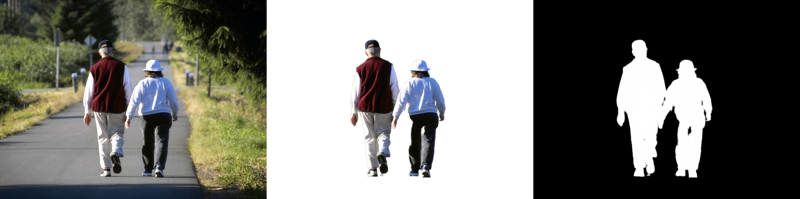

2.jpg 



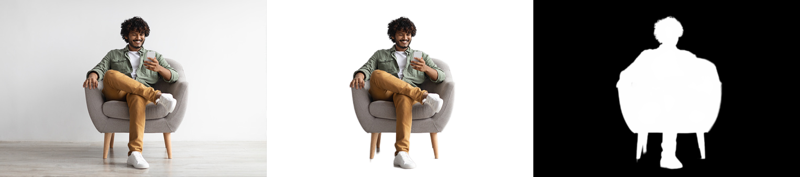

5.jpg 



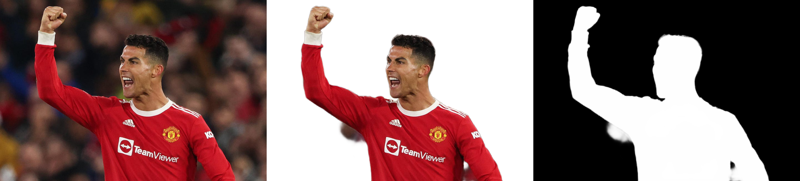

ronaldo.jpg 



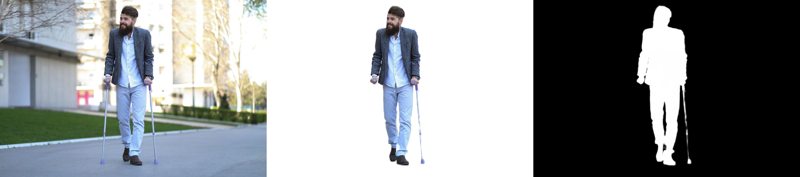

1.jpg 



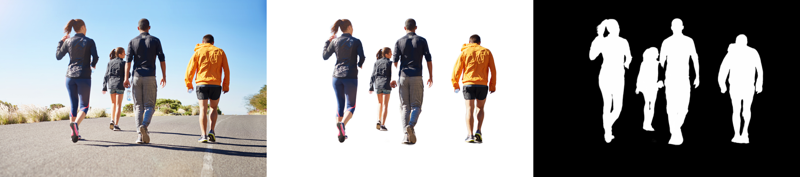

11.jpg 



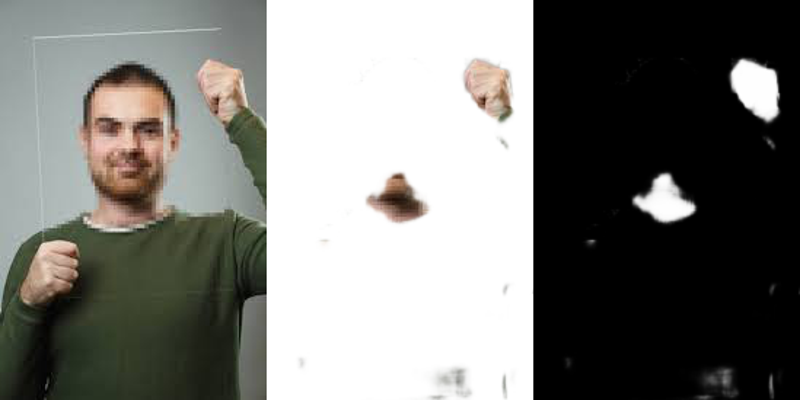

blur.jpg 



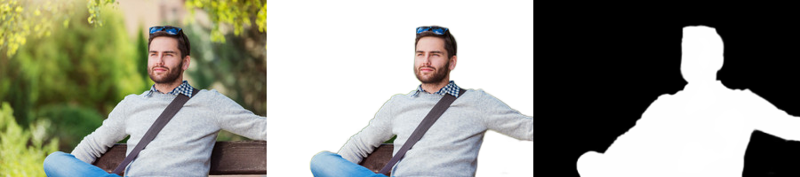

6.jpg 



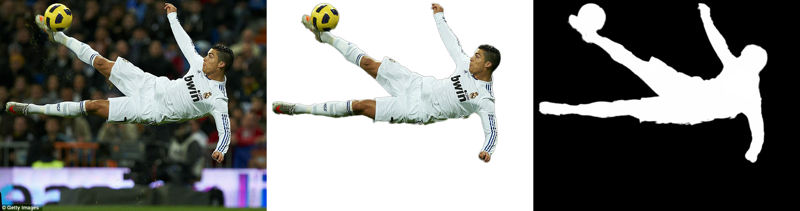

7.jpg 



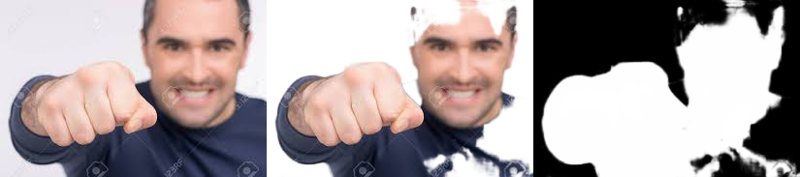

blur_image1.jpg 



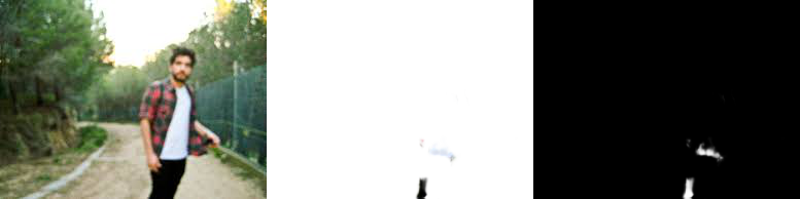

blur_image.jpg 



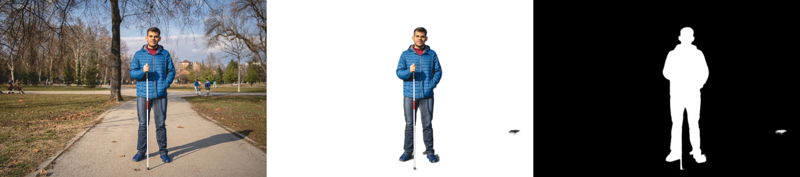

4.jpg 



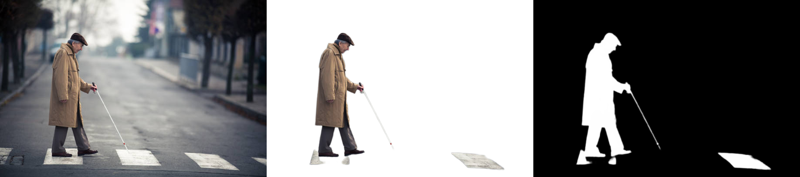

3.jpg 



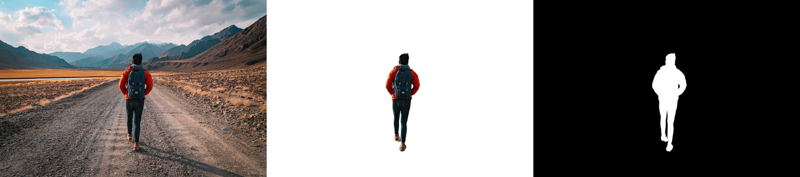

Tall-People-Walk-Faster.jpg 



In [ ]:
import numpy as np
from PIL import Image

def combined_display(image, matte):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))
  
  # obtain predicted foreground
  image = np.asarray(image)
  if len(image.shape) == 2:
    image = image[:, :, None]
  if image.shape[2] == 1:
    image = np.repeat(image, 3, axis=2)
  elif image.shape[2] == 4:
    image = image[:, :, 0:3]
  matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
  foreground = image * matte + np.full(image.shape, 255) * (1 - matte)
  
  # combine image, foreground, and alpha into one line
  combined = np.concatenate((image, foreground, matte * 255), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined

# visualize all images
image_names = os.listdir(input_folder)
for image_name in image_names:
  matte_name = image_name.split('.')[0] + '.png'
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(output_folder, matte_name))
  display(combined_display(image, matte))
  print(image_name, '\n')